# Convolutional Neural Network - Classification Challenge

Last week, we learned about:
- the theory behind convolutional neural networks in the [CNN Crash Course (UMich only link)](https://docs.google.com/presentation/d/1p3EWFMfTNT773PEt3q16tlLxQ4FuD-JTwnTj1A_N4a0/edit?usp=sharing)
- PyTorch and the API used to develop convolutional neural networks in [PyTorch and CNNs Tutorial](https://github.com/MichiganDataScienceTeam/W24-RvF/blob/main/notebooks/pytorch_cnn.ipynb)

Before we dive into actually classifying real vs fake faces, we will get some practice applying this CNN knowledge in a competition today!

In [ ]:
%pip install torch torchvision tqdm

## Challenge

**Goal**: Work together in teams to determine the highest possible accuracy while classifying images in the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.

In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

torch.manual_seed(42)

## Introduction to the Dataset

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset is a simple image classification dataset with input images having one of ten objects in it:

|Semantic Label|Numerical Label|
|--|--|
| airplane | 0 |
| automobile | 1 |
| bird | 2 |
| cat | 3 |
| deer | 4 |
| dog | 5 |
| frog | 6 |
| horse | 7 |
| ship | 8 |
| truck | 9 |


Your challenge will be to classify the object in each image correctly. Each image is a 32x32 image, meaning that each image is pretty small and is not very detailed


Below is an example of some of the images for this dataset:

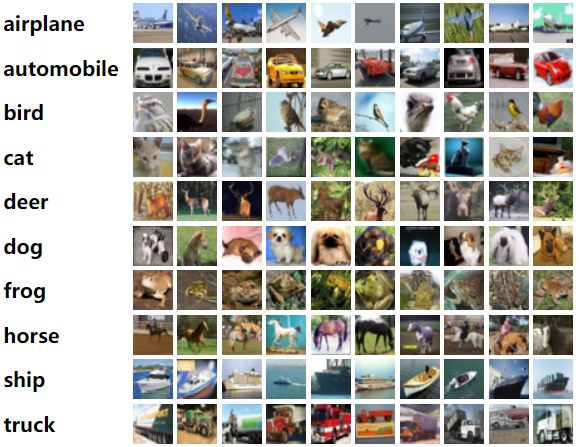

To load this dataset, use the `Dataset` objects provided by the `torchvision` package! If you want a refresher, review the "Loading Training and Testing Data
" section of the PyTorch and CNNs tutorial. [PyTorch and CNNs Tutorial](https://github.com/MichiganDataScienceTeam/W24-RvF/blob/main/notebooks/pytorch_cnn.ipynb).

# Image Pre-Processing

The function below is a **image preprocessing** function that helps clean up the images in the dataset and prep them for training. We will discuss more details later in the project on image preprocessing steps (as it is the most critical part of any computer vision project).

This preprocessing step perform what's called a **per-channel normalization computation**. To break it down:
- We know images have **three input channels** - one for red, one for green, one for blue. This is how computers perceive color! 
- To make "training nicer", we want the distribtion of values in each channel to be normally distributed - so we subtract the mean and divide by the standard deviation

![RGB Channels](https://res.cloudinary.com/practicaldev/image/fetch/s--7uHGwEG8--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://i.ibb.co/HgnybWG/rgb.png)

In [ ]:
def get_converter():
    """
    Convert image to format fit for training a model (convert to Tensor and normalize image values for stability). 
    
    Edit this function to change your feature engineering steps! Some things to try:
    - Select a subset of channels (e.g. only use the red and green channels)
    - Create a random crop of the image to tackle image bias
    - Create a new channel that is a combination of the other channels
    """
    pil_converter = transforms.PILToTensor()
    img_mean = torch.tensor([125.3069, 122.9501, 113.8660]).reshape((3,1,1))
    img_std = torch.tensor([51.5869, 50.8501, 51.2454]).reshape((3,1,1))
    def converter(image):
        return (pil_converter(image).to(torch.float32) - img_mean) / img_std
    return converter

In [ ]:
converter = get_converter()
train = datasets.CIFAR10(root="./private", download=True, train=True, transform=converter)
test = datasets.CIFAR10(root="./private", download=True, train=False, transform=converter)

# Classification Challenge

Use the space below to come up with a classification solution that gets the highest accuracy! The team with the highest test set performance gets a prize 👀.

## Recommended Approach
1. **Create a basic convolutional neural network** - train it using the `train_loader` below, and evaluate test set performance using `test_loader`. We provide starter code below to do that for you
2. **Tweak hyperparameters** like learning rate and batch size until you get a model that has a test set performance that you are happy with!
3. Iterate and improve on your previous strategy:
   - **Change your architecture** - Try things like:
     - Changing the stride, padding, and filter size/count for your convolution layers
     - Adding more convolution layers, pooling layers
     - Trying different activation functions - see [this](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) list for potential activation functions
   - **Add regularization methods** - These methods help prevent your model from [overfitting](https://aws.amazon.com/what-is/overfitting/#:~:text=Overfitting%20is%20an%20undesirable%20machine,on%20a%20known%20data%20set.).
     - See [this presentation](https://web.eecs.umich.edu/~justincj/slides/eecs498/WI2022/598_WI2022_lecture10.pdf) (slides 21-31) for examples of good regularization techniques. 
     - You may want to search up on the internet how to implement these regularization methods in your model!
   - **Change your data preprocessing steps** - Edit `get_converter()` above to do some other things! Consider:
     - Added **data augmentation** - see [this (UMich Only)](https://docs.google.com/presentation/d/17UR5VUFLkjDQjKk1FsmzIUKlkk4H3_yo3OccSJzj9bQ/edit?usp=sharing) presentation from last semester's RvF project on data augmentation approaches and why it is useful
4. Test your results again, and go back to step 3!

You have complete control over your approach!

## Starter Code

In [ ]:
from typing import Callable

def evaluate(model: nn.Module, criterion: Callable, loader: DataLoader) -> tuple[float]:
    model.eval()
    with torch.no_grad():
        correct, total = 0,0
        loss = 0.0
        for X, y in loader:
            outputs = model(X)
            loss += criterion(outputs, y).detach().sum().item()
            _, predicted = torch.max(outputs.data, 1) # get predicted digit
            total += len(y)
            correct += (predicted == y).sum().item()
    model.train()
    return correct / total, loss / total

In [ ]:
class CNN(nn.Module):
    # TODO: Define your CNN here!
    pass

In [ ]:
from tqdm import tqdm
from torchvision.models import MobileNetV3

epochs = 20  # Change Number of epochs
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []

train_loader = DataLoader(train, batch_size=32)  # experiment with batch sizes here!
test_loader = DataLoader(test, batch_size=32)  # experiment with batch sizes here!

model = CNN() 
criterion = None  # define a loss function here
optimizer = None  # Choose an optimizer here (recommendation: use torch.optim.Adam)

for epoch in range(epochs):
    model.train()

    for X, y in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

    train_accuracy, train_loss = evaluate(model, criterion, train_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    test_accuracy, test_loss = evaluate(model, criterion, test_loader)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(
        f"Epoch {epoch + 1}: Loss - (Train {train_loss:.2f}/Test {test_loss:.2f}, "
        f"Accuracy - (Train {train_accuracy:.2f}/Test {test_accuracy:.2f})"
    )